In [1]:
from featureman.gen_data import OneLayerTransformer
import numpy as np
import torch
from matplotlib import pyplot as plt

In [5]:
model_dict = torch.load("modular_arithmetic_model.pth")
model = OneLayerTransformer(p=113, d_model=128, nheads=4)
model.load_state_dict(model_dict)
W_e = model.embedding.weight.detach().cpu().numpy()

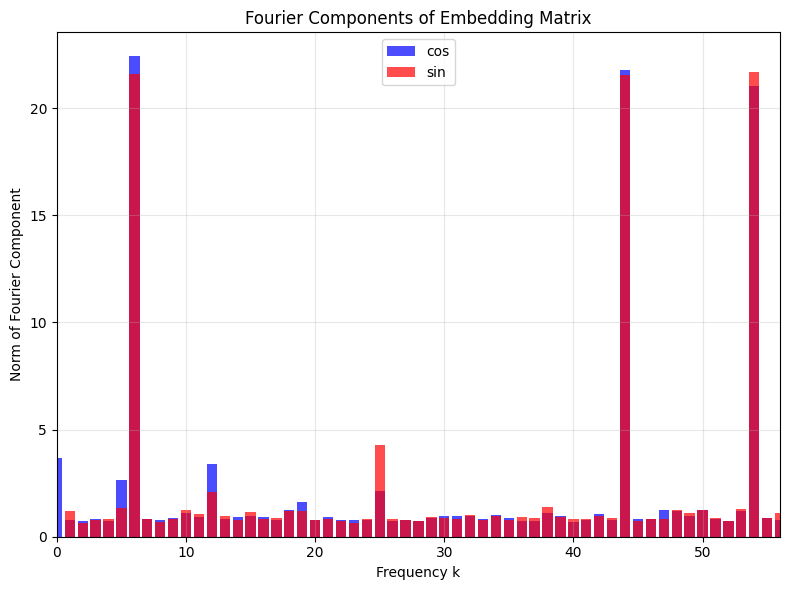

Top cosine frequencies: [ 6 44 54  0 12  5 25 19 47 18]
Top sine frequencies: [54  6 44 25 12 38  5 53 48 50]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft


def plot_embedding_fourier_components(W_e, P=113, max_freq=56):
    W_e_numbers = W_e[:P, :]  # Shape: (113, 128)

    W_e_fft = fft(W_e_numbers, axis=0)  # Shape: (113, 128)

    cos_norms = np.linalg.norm(np.real(W_e_fft), axis=1)
    sin_norms = np.linalg.norm(np.imag(W_e_fft), axis=1)

    freqs = np.arange(max_freq + 1)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.bar(freqs, cos_norms[: max_freq + 1], color="b", label="cos", alpha=0.7)
    plt.bar(freqs, sin_norms[: max_freq + 1], color="r", label="sin", alpha=0.7)

    plt.xlabel("Frequency k")
    plt.ylabel("Norm of Fourier Component")
    plt.title("Fourier Components of Embedding Matrix")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(0, max_freq)

    plt.tight_layout()
    plt.show()

    return cos_norms, sin_norms, freqs


cos_norms, sin_norms, freqs = plot_embedding_fourier_components(W_e)

print("Top cosine frequencies:", np.argsort(cos_norms[:57])[-10:][::-1])
print("Top sine frequencies:", np.argsort(sin_norms[:57])[-10:][::-1])